# Deel 2: Missing Values/Proximity Matrix
Wat zijn de grote krachten van een randomforest? Dat het relatief minder uitmaakt als bij andere algoritmes dat de data schoon is. Hieronder gaan we een paar oefeningen doen om deze missende data zo goed mogelijk te interpreteren.

In [1]:
import warnings
import operator
import random

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

random.seed(630)
warnings.filterwarnings('ignore')

We laden hier de heart-disease dataset in, maar we verwijderen allerlei random data uit de dataset.<br>
Wij gaan proberen om die waarden zo goed mogelijk in te vullen en een zo hoog mogelijke score te krijgen.

In [2]:
heart_df = pd.read_csv('heart.csv')
# Train data wordt gemaakt voor verder gebruik
X_mf = heart_df.drop('target', axis=1)
y_mf = heart_df[['target']]
print(X_mf)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  


In [3]:
y_mf.head()

,target
0,1
1,1
2,1
3,1
4,1


In de lijst <b>zeroedout</b> staan alle row indices en kolomnamen waar we iets mee gaan doen.

In [4]:
zeroedout = []
for i in range(int(X_mf.size * 0.3)):
    row = random.randint(0, len(X_mf) - 1)
    col = random.choice((X_mf).columns)
    zeroedout.append((row, col))
zeroedout[:10]

[(233, 'cp'),
 (259, 'sex'),
 (187, 'trestbps'),
 (131, 'ca'),
 (84, 'restecg'),
 (192, 'oldpeak'),
 (47, 'trestbps'),
 (105, 'restecg'),
 (220, 'exang'),
 (135, 'ca')]

### Laten we onze baseline zetten

Hieronder veranderen we alle zeroedout cellen naar 0.<br>
Daarna testen we welke score dit opleverd.<br>
Dit levert een score op van <b>0.75</b>

In [5]:
rfc = RandomForestClassifier(random_state=0)
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [6]:
def change_zero_out(zeroedout,waarden_naar_veranderen,X_mf):    
    for i in zeroedout:
        index = i[0] # Dit is de index van row die aangepast moet worden
        col = i[1] # Dit is de kolomnaam van de row die aangepast moet worden
        #Veranderd de waarden die aangegeven staat in zeroedout naar de gegeven schattingswaarden
        X_mf[col][index] = 0
    return X_mf

# Hieronder wordt de data gesplit en wordt het model gefit en gescored
X_mf = change_zero_out(zeroedout,0,X_mf)
X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(X_mf, y_mf, random_state=0)
rfc.fit(X_train_mf, y_train_mf)
rfc.score(X_test_mf, y_test_mf)

0.7763157894736842

Probeer nu hetzelfde, maar verander dan alle zeroedout data naar het gemiddelde, mediaan en de modus.<br>
Laat vervolgens de score voor elke soort zien.

In [7]:
def change_function(zeroedout,value_to_change_to,X_mf):    
    for i in zeroedout:
        index = i[0] # Dit is de index van row die aangepast moet worden
        col = i[1] # Dit is de kolomnaam van de row die aangepast moet worden
        #Veranderd de waarden die aangegeven staat in zeroedout naar de gegeven schattingswaarden
        X_mf[col][index] = value_to_change_to[col]
    return X_mf

In [8]:
# Mean    
X_mean = X_mf.mean()
X_mf = change_function(zeroedout,X_mean,X_mf)
X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(X_mf, y_mf, random_state=0)
rfc.fit(X_train_mf, y_train_mf)
rfc.score(X_test_mf, y_test_mf)

0.8026315789473685

In [9]:
# Mode
X_mode = X_mf.mode()
X_mf = change_zero_out(zeroedout,X_mode,X_mf)
X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(X_mf, y_mf, random_state=0)
rfc.fit(X_train_mf, y_train_mf)
rfc.score(X_test_mf, y_test_mf)


0.7763157894736842

In [10]:
# Median
X_median = X_mf.median()
X_mf = change_zero_out(zeroedout,X_median,X_mf)
X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(X_mf, y_mf, random_state=0)
rfc.fit(X_train_mf, y_train_mf)
rfc.score(X_test_mf, y_test_mf)


0.7763157894736842

Over het algemeen is er nog een beter manier om een eerste schatting te maken, en dat is om het gemiddelde te pakken voor numerieke datapunten en de modus voor categoriale. Maar dan niet het gemiddelde en modus van de gehele dataset, maar van de datapunten met dezelfde target waarde.<br><br>

De eerste stap is uitzoeken welke waarden categoriaal zijn. Zet deze in de lijst categorial_cols.

In [11]:
#looking at the documentation of the data set the following are categories
categorial_cols = ["sex","cp","fbs","exang",]


Vervolgens gaan we per zeroedoud datapunt kijken of het een categoriale waarde is.<br> Zo ja, pakken we de modus van alle waarden met target waarde. En zo nee, pakken we het gemiddelde van alle waarden met die target waarde.<br>
Welke score komt er dan uit het model?

In [12]:
def better(zeroedout,X_mf,categorial_cols):
    mode = X_mf.mode()
    mean = X_mf.mean()   
    for i in zeroedout:
        index = i[0]
        col = i[1]
        if col in categorial_cols:
            X_mf[col][index] = mode[col]
        else:
            X_mf[col][index] = mean[col]
    return X_mf

X_mf = better(zeroedout,X_mf,categorial_cols)
X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(X_mf, y_mf, random_state=0)
rfc.fit(X_train_mf, y_train_mf)
rfc.score(X_test_mf, y_test_mf)


0.8026315789473685

# RFC.apply
Nu we schattingen hebben ingevuld kunnen we de randomforest toepassen op alle data.<br>
Dit doen we met de apply functie. Deze functie geeft een lijst terug met per tree bij welke leaf nodes alle rows terecht komen.<br>
Standaard bij deze dataset kiest sklearn ervoor om 100 bomen te gebruiken. Dit zie je terug bij de shape[1] van de apply.

In [13]:
leaves = rfc.apply(X_mf)
print(leaves.shape)
leaves

(303, 100)


array([[60, 25, 42, ..., 73, 67, 34],
       [99, 54, 30, ..., 52, 64, 48],
       [38, 49, 97, ..., 50, 81, 48],
       ...,
       [61, 35, 69, ..., 45, 33, 77],
       [67, 33, 11, ...,  3, 53, 22],
       [53, 33, 22, ..., 50, 62, 48]], dtype=int64)

<b>Wanneer rows in dezelfde leaf node eindigen, definieren wij deze als soortgelijk.</b><br>
Het is niet de bedoeling dat we hier met de hyperparameters gaan knoeien, omdat de proximity matrix dan sub-optimaal zou kunnen werken. Als er te weinig vergelijkbare rows zijn, is er vaak sprake van overfitting. Terwijl andersom vaak een teken is van underfitting. Maar dit is geen probleem met de standaard parameters.

## Proximity Matrix
We houden in een proximity matrix bij welke rows soortgelijk zijn aan anderen<br>
Dus wanneer als voorbeeld regel 2 in dezelfde leaf node terecht komt als regel 3, Verhogen we deze cell met 1.<br>
Een proximity matrix is altijd inverted hetzelfde. de x en y as zijn hieronder allebei de row index.<br>

|   | 1 | 2 | 3 | 4 |
|---|---|---|---|---|
| 1 |   |   |   |   |
| 2 |   |   | 1 |   |
| 3 |   | 1 |   |   |
| 4 |   |   |   |   |

Optimaal zou zijn dat we maar een spiegelkant van de matrix zouden berekenen (en nog het liefst alleen de rows met missende data). Maar voor het programmeer gemak en duidelijkheid doen we ze allebei.

De opdracht is om een matrix terug te geven die aangeeft tot hoeverre elke row gelijksoortig is aan elke andere row.<br>
We doen dit door voor elke boom elke row met elke row te vergelijken en te kijken of deze in dezelfde leaf eindigt.

Een goede indicatie of de matrix klopt, is het gegeven dat elke row altijd maximaal gelijksoortig is aan zichzelf.<br> Dit betekent dat er een diagonale lijn van linksboven naar rechtsonder aanwezig moet zijn.

Ten slotte heeft de functie het argument "normalize". Wanneer deze True is, moeten alle proximities gedeeld door het aantal trees worden gedaan. Dit, zodat de hele matrix binnen de schaal van 0 (totaal verschillend) naar 1 (100% soortgelijk) valt. Om de laatste stap te doen (het toepassen van de matrix) moet de matrix eerst genormaliseerd zijn.

In [14]:
def proximityMatrix(model, X, normalize=True):
     # Lijst met alle end nodes per row voor elke tree zoals hierboven uitgelegd.
    leaves = model.apply(X)
    
    # Het aantal rows en trees in de dataset
    n_rows = leaves.shape[0]
    n_trees = leaves.shape[1]
    
    # De proximity matrix heeft een shape van NxN waar N het aantal rows zijn.
    """ First thougth the matrix was the other way around so that matrix[i] corresponded with a tree and         not a row wrote this code for that problem but I don't want to take it away because it spend way         to long on it
        unique_end_leave = np.unique(leaves)
        for end_leave in unique_end_leave:
            # retruns a array of all index where the a value is equel to the end leave.
            # No we know what which indexes all end in the leave 10 for example and are therfore the                   same
            # if we do this for all our unique end leaves we know which rows correspond
            # we only want the second array they hold the index of the row where val = end leave
            index_val_corr_end_leave = np.where(leaves == end_leave)[1] 
            for index in np.unique(index_val_corr_end_leave):
                # takes all the rows that correspond to end_leave
                for i in index_val_corr_end_leave:
                    proximity_matrix[index][i] += 1
                proximity_matrix[index][index] -= 1
        """
    #Code as it should be
    proximity_matrix = np.zeros([n_rows,n_rows])
    for i in range(len(leaves)):
        for m in range(len(leaves)):
            proximity_matrix[i][m] = np.sum(leaves[i] == leaves[m])/n_trees

    
    
    return proximity_matrix

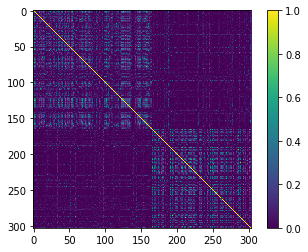

In [15]:

plt.imshow(proximityMatrix(rfc, X_mf, normalize=True))
plt.colorbar()

## Het toepassen van de matrix
Omdat wij denken dat het toepassen van de matrix te ingewikkeld is om binnen de scope van deze workshop te houden, hebben wij ervoor gekozen om de functie die de matrix toepast alvast in te vullen.

Voor een duidelijke uitleg van wat er in deze functie gebeurt refereren we je naar de volgende zeer hulpzame [video](https://www.youtube.com/watch?v=sQ870aTKqiM).<br>
Deze functie gebruikt de matrix functie van hierboven. Als deze niet/fout is gemaakt, produceert deze functie een error.

In [ ]:
X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(X_mf, y_mf, random_state=0)
rfc.fit(X_train_mf, y_train_mf)
rfc.score(X_test_mf, y_test_mf)

# het hele proces steeds opnieuw doen om de waardes proberen te verbeteren
for redo in range(3):
    
    # bereken de proximity matrix van het model met de dataset
    matrix = proximityMatrix(rfc, X_mf)
    
    # itereer over de locaties van de waardes die we willen opvullen
    for coord in zeroedout:

        # de som van de gewichten uit de matrix (uit de rij van bijbehorende locatie)
        sum_of_weights = sum(matrix[i[0]])
        weights = {}
        new_value = 0
        
        # categorische data
        if i[1] in categorial_cols:  
            
            # itereer over procentuele voorkomen van bepaalde values
            for value, freq in X_mf[coord[1]].value_counts(normalize=True).items():
                final_weight = 0
                
                # itereer over de weights in de huidige index rij
                for index, weight in enumerate(matrix[coord[0]]):
                    # kijk of de categorische waarde voorkomt en tel de weight op als dit zo is
                    if X_mf[coord[1]][index] == value:
                        final_weight += weight
                
                # bereken voor alle voorkomende values de weighted som
                weights[value] = freq * (weight / sum_of_weights)
            
            # hopelijk een betere voorspelling voor de lege of slechte categorische waarde
            new_value = max(weights.items(), key=operator.itemgetter(1))[0]

        else:  # numerieke data
        
            # the weighted sum voor alle gewichten in de huidige indexed rij
            for index, weight in enumerate(matrix[coord[0]]):
                new_value += (weight / sum_of_weights) * X_mf[coord[1]][index]

        # hopelijk een betere voorspelling voor de lege of slechte numerieke waarde
        X_mf[coord[1]][coord[0]] = new_value

    # testen
    X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(X_mf, y_mf, random_state=0)
    rfc.fit(X_train_mf, y_train_mf)
    print(rfc.score(X_test_mf, y_test_mf))